In [1]:
import os
import cv2
from PIL import Image
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import normalize, to_categorical
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_directory = '/content/drive/My Drive/ML_PROJECTS/'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

fog_images = os.listdir(image_directory+'Fog')
for i, image_name in enumerate(fog_images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory +'Fog/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

rain_images = os.listdir(image_directory+'Rain/')
for i, image_name in enumerate(rain_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory +'Rain/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

normal_images = os.listdir(image_directory+'Normal/')
for i, image_name in enumerate(normal_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory +'Normal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)

dataset = np.array(dataset)
label = np.array(label)

print(dataset.shape)
print(label.shape)

(700, 150, 150, 3)
(700,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


from tensorflow.keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
INPUT_SHAPE = (SIZE, SIZE, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 30,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4115 - loss: 1.1013 - val_accuracy: 0.5714 - val_loss: 0.9303
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.4950 - loss: 0.9916 - val_accuracy: 0.5929 - val_loss: 0.8238
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6623 - loss: 0.7649 - val_accuracy: 0.7500 - val_loss: 0.5237
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7392 - loss: 0.6234 - val_accuracy: 0.6643 - val_loss: 0.7099
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.7168 - loss: 0.6363 - val_accuracy: 0.7357 - val_loss: 0.5368
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.7692 - loss: 0.5400 - val_accuracy: 0.7143 - val_loss: 0.5886
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7503 - loss: 0.5482 - val_accuracy: 0.7214 - val_loss: 0.5531
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7375 - loss: 0.5521 - val_accuracy: 0.7571 - val_loss: 

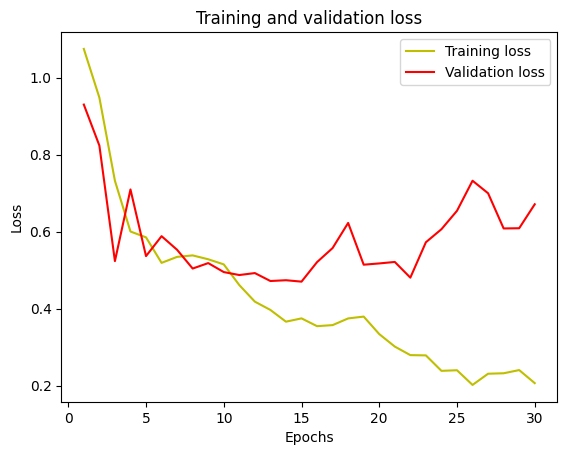

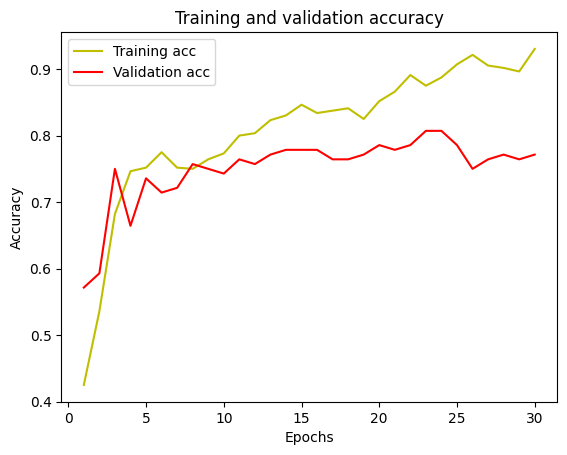

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save(image_directory+'fog_rain_normal.h5')

In [ ]:
import os
os.fsync(os.open(image_directory+'fog_rain_normal.h5', os.O_RDWR))

In [6]:
from keras.models import load_model
image_directory = '/content/drive/My Drive/ML_PROJECTS/'
# Load the saved model
model = load_model(image_directory+'fog_rain_normal.h5')
